In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#imports
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
from datetime import datetime

In [5]:
df = pd.read_excel("/content/drive/MyDrive/Mon petit placement/data.xlsx")

In [ ]:
df.dtypes

Genre                                         object
CSP                                           object
Date de naissance                             object
Date de validation du mail            datetime64[ns]
Date de création du conseil           datetime64[ns]
Date de validation du conseil         datetime64[ns]
Date de signature du bulletin         datetime64[ns]
Montant sous gestion                         float64
Montant initial                              float64
Abondement mensuel                           float64
Durée                                        float64
Type utilisateur                              object
Nombre filleuls                              float64
Niveau expérience financière                  object
Niveau appétence au risque                    object
Niveau capacité de prise de risque            object
Objectifs d'investissement                    object
Patrimoine total                             float64
Revenus                                      f

In [ ]:
df.head()

,Genre,CSP,Date de naissance,Date de validation du mail,Date de création du conseil,Date de validation du conseil,Date de signature du bulletin,Montant sous gestion,Montant initial,Abondement mensuel,Durée,Type utilisateur,Nombre filleuls,Niveau expérience financière,Niveau appétence au risque,Niveau capacité de prise de risque,Objectifs d'investissement,Patrimoine total,Revenus,Statut marital,Nombre d'enfants à charge
0,NaN,NaN,NaN,2020-01-21 22:21:12,NaT,NaT,NaT,NaN,NaN,NaN,NaN,Prospect,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,Madame,NaN,NaN,2020-02-19 12:21:26,NaT,NaT,NaT,NaN,500.0,100.0,5.0,Prospect,NaN,initie,offensif,peu,"['Constituer une épargne de précaution', 'Dyna...",0.0,2000.0,Concubin (e),0.0
2,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,Prospect,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,Monsieur,company-manager,18/06/1979,2020-02-05 07:30:42,NaT,NaT,NaT,NaN,1000.0,100.0,5.0,Prospect,NaN,confirme,dynamique,beaucoup,"['Constituer une épargne de précaution', 'Prép...",2000000.0,56400.0,Marié(e),3.0
4,Madame,company-manager,02/12/1961,2020-03-29 14:11:37,NaT,NaT,NaT,NaN,4000.0,0.0,8.0,Prospect,NaN,confirme,dynamique,peu,"['Constituer une épargne de précaution', 'Prép...",100.0,100.0,Marié(e),1.0


In [ ]:
df.shape

(10000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Genre                               5033 non-null   object        
 1   CSP                                 2960 non-null   object        
 2   Date de naissance                   4492 non-null   object        
 3   Date de validation du mail          8970 non-null   datetime64[ns]
 4   Date de création du conseil         1771 non-null   datetime64[ns]
 5   Date de validation du conseil       1433 non-null   datetime64[ns]
 6   Date de signature du bulletin       1048 non-null   datetime64[ns]
 7   Montant sous gestion                982 non-null    float64       
 8   Montant initial                     6329 non-null   float64       
 9   Abondement mensuel                  6306 non-null   float64       
 10  Durée                  

In [ ]:
df.describe()

,Montant sous gestion,Montant initial,Abondement mensuel,Durée,Nombre filleuls,Patrimoine total,Revenus,Nombre d'enfants à charge
count,982.000000,6.329000e+03,6.306000e+03,6329.000000,1.0,5.518000e+03,5579.000000,5323.00000
mean,3436.456212,4.741925e+08,2.255149e+04,4.607363,5162.0,1.289913e+08,3754.185338,0.36408
std,4782.180531,3.770975e+10,1.356218e+06,4.458108,NaN,8.190240e+09,19832.825383,0.80845
min,100.000000,0.000000e+00,0.000000e+00,0.000000,5162.0,0.000000e+00,0.000000,0.00000
25%,1200.000000,5.000000e+02,1.000000e+02,2.000000,5162.0,2.500000e+03,1100.000000,0.00000
50%,2200.000000,1.000000e+03,1.000000e+02,5.000000,5162.0,2.000000e+04,2100.000000,0.00000
75%,4100.000000,3.500000e+03,2.000000e+02,5.000000,5162.0,1.900000e+05,3700.000000,0.00000
max,100600.000000,3.000000e+12,1.000000e+08,80.000000,5162.0,6.000600e+11,1000000.000000,5.00000


In [ ]:
df.describe(include=['object'])

,Genre,CSP,Date de naissance,Type utilisateur,Niveau expérience financière,Niveau appétence au risque,Niveau capacité de prise de risque,Objectifs d'investissement,Statut marital
count,5033,2960,4492,9045,6278,6044,5005,9045,5323
unique,2,27,3499,2,4,4,4,708,7
top,Monsieur,corporate-administrative-commercial-executive,09/04/1998,Prospect,initie,dynamique,beaucoup,[],Célibataire
freq,4086,1098,6,7993,2982,2898,2082,2571,3448


In [ ]:
#955 duplicate row
len(df) - len(df.drop_duplicates()) 

955

In [ ]:
# all rows has at leat one missing value
len(df.dropna())

0

In [ ]:
na_dist = pd.DataFrame((df.isna().sum() /len(df)).sort_values(ascending=False), columns=["x"]).reset_index().rename(columns = {'index': 'variable', 'x': 'pourcentage'})
df.index.name = 'bar'
fig = px.bar(na_dist, x='variable', y='pourcentage',
             color='variable',
             labels={'% des variables nulles'}, height=600)
fig.show()

In [ ]:
df[df.duplicated()].sample(2)

,Genre,CSP,Date de naissance,Date de validation du mail,Date de création du conseil,Date de validation du conseil,Date de signature du bulletin,Montant sous gestion,Montant initial,Abondement mensuel,Durée,Type utilisateur,Nombre filleuls,Niveau expérience financière,Niveau appétence au risque,Niveau capacité de prise de risque,Objectifs d'investissement,Patrimoine total,Revenus,Statut marital,Nombre d'enfants à charge
9020,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,Prospect,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1678,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,Prospect,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


# Visualistion des distrubitions des variables


In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
date_features = df.select_dtypes(include=["datetime64"]).columns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



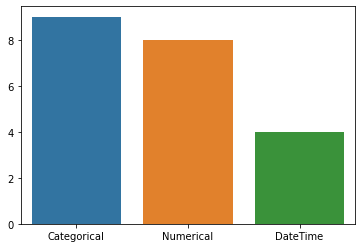

In [ ]:
features = ["Categorical","Numerical","DateTime"]
count_features = [len(categorical_features ),len(numeric_features),len(date_features)]

sns.barplot(features,count_features)

In [ ]:
categorical_features

Index(['Genre', 'CSP', 'Date de naissance', 'Type utilisateur',
       'Niveau expérience financière', 'Niveau appétence au risque',
       'Niveau capacité de prise de risque', 'Objectifs d'investissement',
       'Statut marital'],
      dtype='object')

In [ ]:

fig = go.Figure(data=[go.Table(header=dict(values=['Categorical_features', 'Numeric_featues','Date_features']),
                 cells=dict(values=[list(categorical_features), list(numeric_features),list(date_features)]))
                     ])
fig.show()

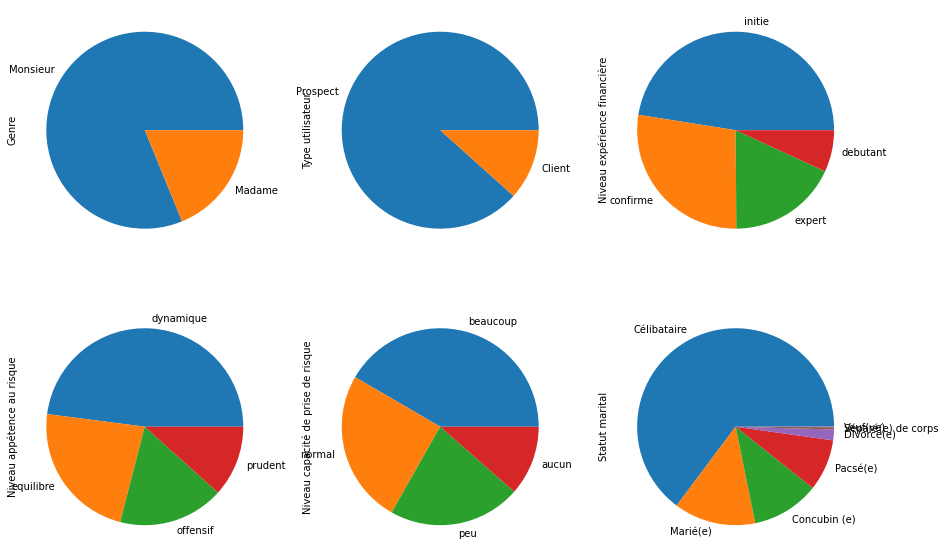

In [ ]:
# catergorie
from matplotlib.transforms import Bbox
fig,axe = plt.subplots(2,3,figsize=(15,10),)
df['Genre'].value_counts().plot(ax = axe[0,0],kind="pie")
df['Type utilisateur'].value_counts().plot(ax = axe[0,1],kind="pie")
df['Niveau expérience financière'].value_counts().plot(ax = axe[0,2],kind="pie")
df['Niveau appétence au risque'].value_counts().plot(ax = axe[1,0],kind="pie")
df['Niveau capacité de prise de risque'].value_counts().plot(ax = axe[1,1],kind="pie")
df['Statut marital'].value_counts().plot(ax = axe[1,2],kind="pie")
#fig.delaxes(axe[1,2])

Categroical Variable en fonction de type d'utilisateur

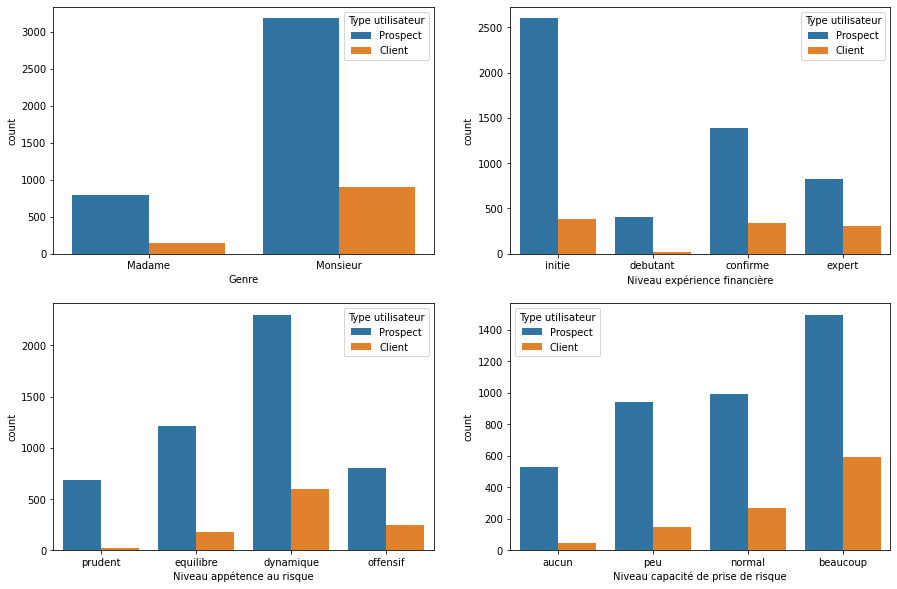

In [ ]:
fig,axe = plt.subplots(2,2,figsize=(15,10))
sns.countplot(data=df,x='Genre',hue="Type utilisateur",ax=axe[0,0])
sns.countplot(data=df,x='Niveau expérience financière',hue="Type utilisateur",ax=axe[0,1],order=["initie","debutant","confirme","expert"])
sns.countplot(data=df,x='Niveau appétence au risque',hue="Type utilisateur",ax=axe[1,0],order =["prudent","equilibre","dynamique","offensif"])
sns.countplot(data=df,x='Niveau capacité de prise de risque',hue="Type utilisateur",ax=axe[1,1],order =["aucun","peu","normal",'beaucoup'])


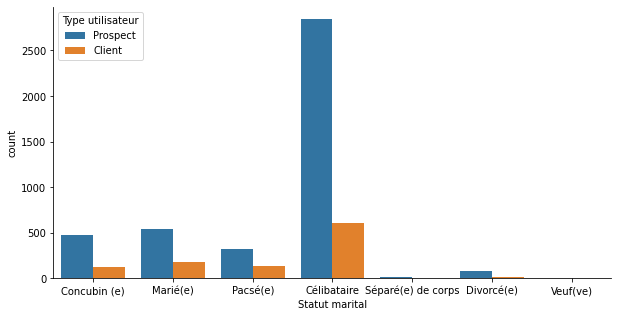

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)
sns.countplot(data=df,x='Statut marital',hue="Type utilisateur",)
sns.despine()


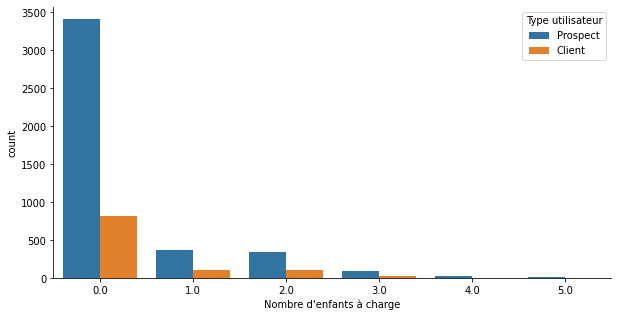

In [7]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)
sns.countplot(data=df,x="Nombre d\'enfants à charge",hue="Type utilisateur",)
sns.despine()

#Numeric features


In [ ]:
def plot_set_histograms(plot_list, title):
    fig = make_subplots(
        rows=3, 
        cols=3
    )
    
    traces = [
        go.Histogram(
            x=df[col], 
            nbinsx=20, 
            name=col
        ) for col in plot_list
    ]

    for i in range(len(traces)):
        fig.append_trace(
            traces[i], 
            (i // 3) + 1, 
            (i % 3) + 1
        )

    fig.update_layout(
        title_text=title,
        height=1000,
       width=1150
    )
    fig.show()

In [ ]:
plot_set_histograms(df[numeric_features],"test")

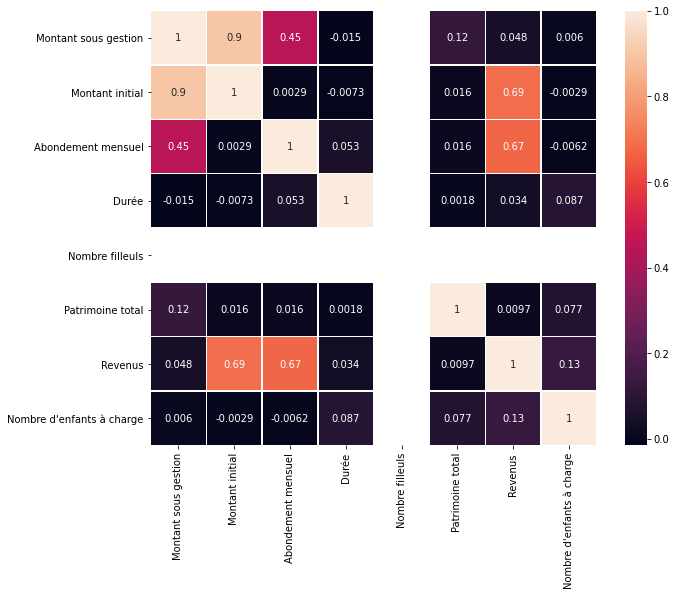

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))   
sns.heatmap(df.corr(),annot=True,linewidths=.5, ax=ax) ;

In [ ]:
def plot_set_boxplot(plot_list, title):
    fig = make_subplots(
        rows=3, 
        cols=3
    )
    
    traces = [
        go.Box(
            y=df[col], 
            
            name=col
        ) for col in plot_list
    ]

    for i in range(len(traces)):
        fig.append_trace(
            traces[i], 
            (i // 3) + 1, 
            (i % 3) + 1
        )

    fig.update_layout(
        title_text=title,
        height=1000,
       width=1150
    )
    fig.show()

In [ ]:
plot_set_boxplot(df[numeric_features],"Boxplots")



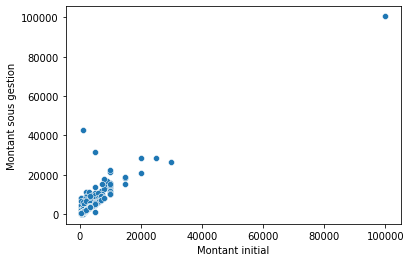

In [ ]:
#Scatter plot pour voir la valeur extreme
scatter_df = df.copy()
scatter_df["random_points"] = np.arange(0,len(df))
sns.scatterplot(data = scatter_df,x="Montant initial", y="Montant sous gestion")

In [ ]:
df[df["Montant sous gestion"] >= 100000]


,Genre,CSP,Date de naissance,Date de validation du mail,Date de création du conseil,Date de validation du conseil,Date de signature du bulletin,Montant sous gestion,Montant initial,Abondement mensuel,Durée,Type utilisateur,Niveau expérience financière,Niveau appétence au risque,Niveau capacité de prise de risque,Objectifs d'investissement,Patrimoine total,Revenus,Statut marital,Nombre d'enfants à charge
2144,Monsieur,corporate-administrative-commercial-executive,05/02/1992,2020-02-23 16:36:50,2020-02-24 16:18:42,2020-02-25 11:56:03,2020-02-26 12:05:00,100600.0,100000.0,0.0,1.0,Client,expert,equilibre,peu,"['Constituer une épargne de précaution', 'Dyna...",196100.0,2500.0,Célibataire,0.0
